In [23]:
# import required packages

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set_style()

In [2]:
# import training data
st = datetime.datetime.now()
train_set = pd.read_csv("../data/train_aWnotuB.csv")
test_set = pd.read_csv("../data/test_BdBKkAj_L87Nc3S.csv")
print("total time required to load data sets ",datetime.datetime.now() - st)

total time required to load data sets  0:00:00.331156


In [3]:
# check few samples from train and test set
train_set.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
test_set.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [5]:
train_set.ID.unique().shape

(48120,)

In [7]:
# check train and test size
train_set.shape,test_set.shape


((48120, 4), (11808, 3))

In [9]:
# check how many unique junctions are available in training set
# junction 4 has minimun samples 
train_set.Junction.value_counts()

3    14592
2    14592
1    14592
4     4344
Name: Junction, dtype: int64

## you can see clear separation for avg no of vehicles passing from each Junction

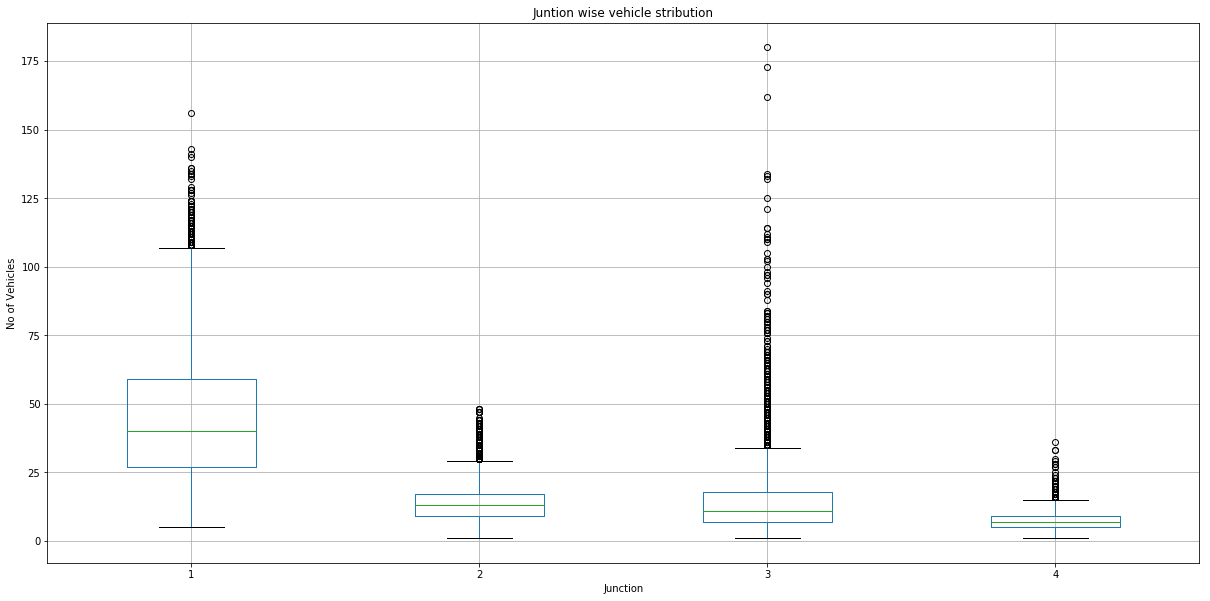

In [15]:
# check juntion wise traffic/vehicles ditribution

train_set.boxplot(column="Vehicles",by="Junction",figsize=(20,10))
plt.title("Juntion wise vehicle distribution")
plt.ylabel("No of Vehicles")
plt.suptitle('')
plt.show()
plt.clf()
plt.close()

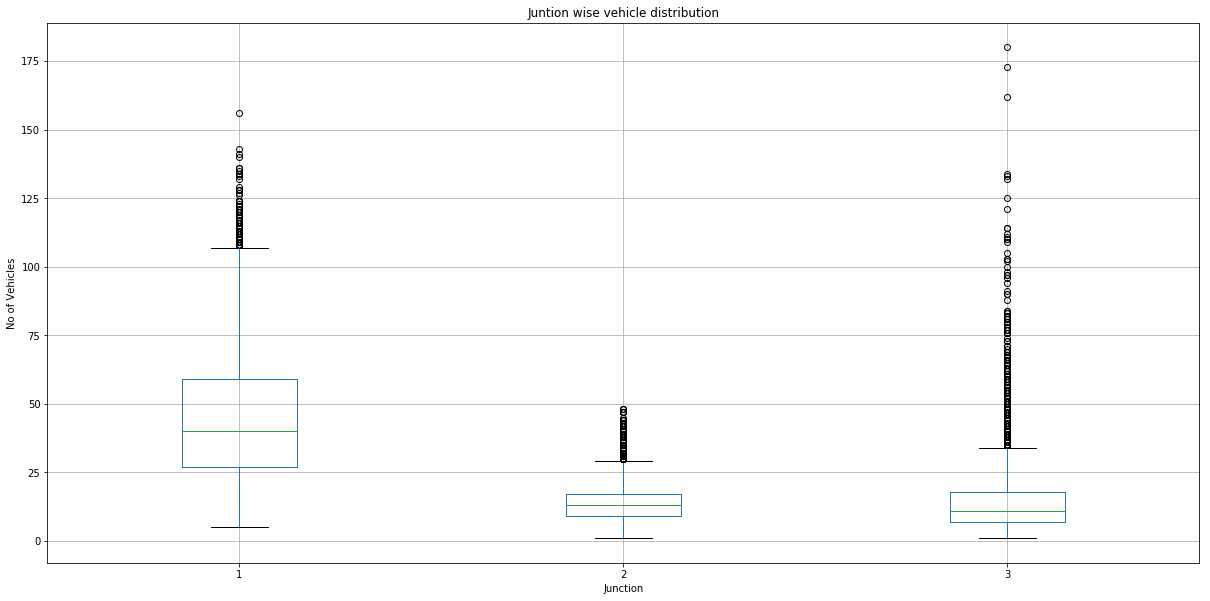

In [16]:
train_set[train_set.Junction!=4].boxplot(column="Vehicles",by="Junction",figsize=(20,10))
plt.title("Juntion wise vehicle distribution")
plt.ylabel("No of Vehicles")
plt.suptitle('')
plt.show()
plt.clf()
plt.close()

In [18]:
train_set.groupby("Junction")["Vehicles"].describe()

,count,mean,std,min,25%,50%,75%,max
Junction,,,,,,,,
1,14592.0,45.052906,23.008345,5.0,27.0,40.0,59.0,156.0
2,14592.0,14.253221,7.401307,1.0,9.0,13.0,17.0,48.0
3,14592.0,13.694010,10.436005,1.0,7.0,11.0,18.0,180.0
4,4344.0,7.251611,3.521455,1.0,5.0,7.0,9.0,36.0


In [26]:
# lets try predicting no of vehicles using Juntion only

# lets prepare data for xgboost modeling

#input features
input_features = ["Junction"]
target = ["Vehicles"]
input_columns = ["Junction","Vehicles"]

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[16:54:55] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 30}

In [28]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

14.55491381146978

In [29]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([43.79403 , 43.79403 , 43.79403 , ...,  7.060707,  7.060707,
        7.060707], dtype=float32)

In [32]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles
0,2017-07-01 00:00:00,1,20170701001,43.794029,43.794029
1,2017-07-01 01:00:00,1,20170701011,43.794029,43.794029
2,2017-07-01 02:00:00,1,20170701021,43.794029,43.794029
3,2017-07-01 03:00:00,1,20170701031,43.794029,43.794029
4,2017-07-01 04:00:00,1,20170701041,43.794029,43.794029
5,2017-07-01 05:00:00,1,20170701051,43.794029,43.794029
6,2017-07-01 06:00:00,1,20170701061,43.794029,43.794029
7,2017-07-01 07:00:00,1,20170701071,43.794029,43.794029
8,2017-07-01 08:00:00,1,20170701081,43.794029,43.794029
9,2017-07-01 09:00:00,1,20170701091,43.794029,43.794029


In [33]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

,count,mean,std,min,25%,50%,75%,max
Junction,,,,,,,,
1,2952.0,43.795269,0.001240,43.794029,43.794029,43.794029,43.794029,43.794029
2,2952.0,13.864533,0.000079,13.864613,13.864613,13.864613,13.864613,13.864613
3,2952.0,13.320715,0.000488,13.321203,13.321203,13.321203,13.321203,13.321203
4,2952.0,7.060585,0.000122,7.060707,7.060707,7.060707,7.060707,7.060707


In [36]:
train_set["Predictions"] = xgb_model.predict(xgb.DMatrix(train_set[input_features]))
train_set


,DateTime,Junction,Vehicles,ID,Predictions
0,2015-11-01 00:00:00,1,15,20151101001,43.794029
1,2015-11-01 01:00:00,1,13,20151101011,43.794029
2,2015-11-01 02:00:00,1,10,20151101021,43.794029
3,2015-11-01 03:00:00,1,7,20151101031,43.794029
4,2015-11-01 04:00:00,1,9,20151101041,43.794029
5,2015-11-01 05:00:00,1,6,20151101051,43.794029
6,2015-11-01 06:00:00,1,9,20151101061,43.794029
7,2015-11-01 07:00:00,1,8,20151101071,43.794029
8,2015-11-01 08:00:00,1,11,20151101081,43.794029
9,2015-11-01 09:00:00,1,12,20151101091,43.794029


#### model may have considered Junction feature as increasing order

##### training and test predictions are same

In [37]:
test_set.groupby("Junction")["Vehicles"].describe()

,count,mean,std,min,25%,50%,75%,max
Junction,,,,,,,,
1,2952.0,43.795269,0.001240,43.794029,43.794029,43.794029,43.794029,43.794029
2,2952.0,13.864533,0.000079,13.864613,13.864613,13.864613,13.864613,13.864613
3,2952.0,13.320715,0.000488,13.321203,13.321203,13.321203,13.321203,13.321203
4,2952.0,7.060585,0.000122,7.060707,7.060707,7.060707,7.060707,7.060707


##### here u can notice, average training predictions are similar as original

In [38]:
train_set.groupby("Junction")["Predictions"].describe()

,count,mean,std,min,25%,50%,75%,max
Junction,,,,,,,,
1,14592.0,43.792942,0.001087,43.794029,43.794029,43.794029,43.794029,43.794029
2,14592.0,13.863423,0.001189,13.864613,13.864613,13.864613,13.864613,13.864613
3,14592.0,13.322938,0.001735,13.321203,13.321203,13.321203,13.321203,13.321203
4,4344.0,7.060573,0.000134,7.060707,7.060707,7.060707,7.060707,7.060707


In [39]:
train_set.groupby("Junction")["Vehicles"].describe()

,count,mean,std,min,25%,50%,75%,max
Junction,,,,,,,,
1,14592.0,45.052906,23.008345,5.0,27.0,40.0,59.0,156.0
2,14592.0,14.253221,7.401307,1.0,9.0,13.0,17.0,48.0
3,14592.0,13.694010,10.436005,1.0,7.0,11.0,18.0,180.0
4,4344.0,7.251611,3.521455,1.0,5.0,7.0,9.0,36.0


#### do one hot encoding of junction feature and train model again

In [41]:
train_set.Junction.dtypes,test_set.Junction.dtypes

(dtype('int64'), dtype('int64'))

In [43]:
# change data type to str
train_set.Junction = train_set.Junction.astype("str")
test_set.Junction = test_set.Junction.astype("str")

In [44]:
train_set.Junction.dtypes,test_set.Junction.dtypes

(dtype('O'), dtype('O'))

In [46]:
# do one hot encoding of train and test set

ohe_train_set = pd.get_dummies(train_set,columns=["Junction"])
ohe_train_set

,DateTime,Vehicles,ID,Predictions,Junction_1,Junction_2,Junction_3,Junction_4
0,2015-11-01 00:00:00,15,20151101001,43.794029,1,0,0,0
1,2015-11-01 01:00:00,13,20151101011,43.794029,1,0,0,0
2,2015-11-01 02:00:00,10,20151101021,43.794029,1,0,0,0
3,2015-11-01 03:00:00,7,20151101031,43.794029,1,0,0,0
4,2015-11-01 04:00:00,9,20151101041,43.794029,1,0,0,0
5,2015-11-01 05:00:00,6,20151101051,43.794029,1,0,0,0
6,2015-11-01 06:00:00,9,20151101061,43.794029,1,0,0,0
7,2015-11-01 07:00:00,8,20151101071,43.794029,1,0,0,0
8,2015-11-01 08:00:00,11,20151101081,43.794029,1,0,0,0
9,2015-11-01 09:00:00,12,20151101091,43.794029,1,0,0,0


In [47]:
ohe_test_set = pd.get_dummies(test_set, columns=["Junction"])
ohe_test_set

,DateTime,ID,predictions,Vehicles,Junction_1,Junction_2,Junction_3,Junction_4
0,2017-07-01 00:00:00,20170701001,43.794029,43.794029,1,0,0,0
1,2017-07-01 01:00:00,20170701011,43.794029,43.794029,1,0,0,0
2,2017-07-01 02:00:00,20170701021,43.794029,43.794029,1,0,0,0
3,2017-07-01 03:00:00,20170701031,43.794029,43.794029,1,0,0,0
4,2017-07-01 04:00:00,20170701041,43.794029,43.794029,1,0,0,0
5,2017-07-01 05:00:00,20170701051,43.794029,43.794029,1,0,0,0
6,2017-07-01 06:00:00,20170701061,43.794029,43.794029,1,0,0,0
7,2017-07-01 07:00:00,20170701071,43.794029,43.794029,1,0,0,0
8,2017-07-01 08:00:00,20170701081,43.794029,43.794029,1,0,0,0
9,2017-07-01 09:00:00,20170701091,43.794029,43.794029,1,0,0,0


In [53]:
input_features = list(ohe_train_set.columns[ohe_train_set.columns.str.startswith("Junction")])
input_features

['Junction_1', 'Junction_2', 'Junction_3', 'Junction_4']

In [55]:
target

['Vehicles']

In [56]:
# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(ohe_train_set[input_features],ohe_train_set[target])
xgb_test_obj = xgb.DMatrix(ohe_test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[18:05:03] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
# check feature importance
xgb_model.get_fscore()

{'Junction_1': 10, 'Junction_4': 10, 'Junction_2': 10}

In [58]:
# evaluate model in training data
np.sqrt(mean_squared_error(ohe_train_set[target],
                           xgb_model.predict(xgb.DMatrix(ohe_train_set[input_features]))
                          )
       )

14.55491381146978

In [59]:
xgb_model.predict(xgb.DMatrix(ohe_train_set[input_features]))

array([43.79403 , 43.79403 , 43.79403 , ...,  7.060707,  7.060707,
        7.060707], dtype=float32)

In [60]:
xgb_model.predict(xgb_test_obj)

array([43.79403 , 43.79403 , 43.79403 , ...,  7.060707,  7.060707,
        7.060707], dtype=float32)

In [62]:
train_set.dtypes

DateTime        object
Junction        object
Vehicles         int64
ID               int64
Predictions    float32
dtype: object

In [65]:
train_set.DateTime = pd.to_datetime(train_set.DateTime)

In [84]:
test_set.DateTime = pd.to_datetime(test_set.DateTime)

In [67]:
train_set.DateTime.describe()

count                   48120
unique                  14592
top       2017-06-09 02:00:00
freq                        4
first     2015-11-01 00:00:00
last      2017-06-30 23:00:00
Name: DateTime, dtype: object

In [69]:
train_set.groupby("Junction").agg({"DateTime":["min","max"]})

DateTime                    
                min                 max
Junction                               
1        2015-11-01 2017-06-30 23:00:00
2        2015-11-01 2017-06-30 23:00:00
3        2015-11-01 2017-06-30 23:00:00
4        2017-01-01 2017-06-30 23:00:00

In [71]:
train_set["year"] = train_set.DateTime.dt.year

In [85]:
test_set["year"] = test_set.DateTime.dt.year

In [75]:
train_set.groupby(["Junction","year"])["Vehicles"].describe()

count       mean        std   min   25%   50%   75%    max
Junction year                                                             
1        2015  1464.0  20.644126   7.785206   6.0  14.0  19.0  26.0   50.0
         2016  8784.0  39.287113  16.824617   5.0  26.0  36.0  50.0  120.0
         2017  4344.0  64.938076  22.849246  14.0  46.0  61.0  83.0  156.0
2        2015  1464.0   8.351093   3.332921   2.0   6.0   8.0  10.0   40.0
         2016  8784.0  11.731557   4.291961   1.0   8.0  11.0  15.0   29.0
         2017  4344.0  21.341390   8.257550   2.0  15.0  20.0  27.0   48.0
3        2015  1464.0   5.534836   4.351776   1.0   3.0   5.0   6.0   39.0
         2016  8784.0  13.142077   9.719853   1.0   7.0  11.0  16.0  134.0
         2017  4344.0  17.559853  11.421694   2.0  10.0  16.0  22.0  180.0
4        2017  4344.0   7.251611   3.521455   1.0   5.0   7.0   9.0   36.0

### check distribution of target

In [76]:
train_set.Vehicles.describe()

count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64

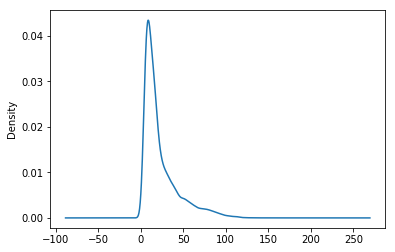

In [79]:
train_set.Vehicles.plot.kde()
plt.show()
plt.clf()
plt.close()

In [82]:
input_features = ["Junction","year"]
target

['Vehicles']

In [90]:
train_set.Junction = train_set.Junction.astype("int")
test_set.Junction = test_set.Junction.astype("int")

In [83]:
# lets use year as feature

In [91]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[19:15:28] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [92]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 50, 'year': 40}

In [93]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

11.909021580753954

In [95]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([63.116062, 63.116062, 63.116062, ...,  7.060707,  7.060707,
        7.060707], dtype=float32)

In [96]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year
0,2017-07-01 00:00:00,1,20170701001,43.794029,63.116062,2017
1,2017-07-01 01:00:00,1,20170701011,43.794029,63.116062,2017
2,2017-07-01 02:00:00,1,20170701021,43.794029,63.116062,2017
3,2017-07-01 03:00:00,1,20170701031,43.794029,63.116062,2017
4,2017-07-01 04:00:00,1,20170701041,43.794029,63.116062,2017
5,2017-07-01 05:00:00,1,20170701051,43.794029,63.116062,2017
6,2017-07-01 06:00:00,1,20170701061,43.794029,63.116062,2017
7,2017-07-01 07:00:00,1,20170701071,43.794029,63.116062,2017
8,2017-07-01 08:00:00,1,20170701081,43.794029,63.116062,2017
9,2017-07-01 09:00:00,1,20170701091,43.794029,63.116062,2017


In [97]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [98]:
# add month feature
train_set["month"] = train_set.DateTime.dt.month
test_set["month"] = test_set.DateTime.dt.month

In [99]:
train_set

,DateTime,Junction,Vehicles,ID,Predictions,year,month
0,2015-11-01 00:00:00,1,15,20151101001,43.794029,2015,11
1,2015-11-01 01:00:00,1,13,20151101011,43.794029,2015,11
2,2015-11-01 02:00:00,1,10,20151101021,43.794029,2015,11
3,2015-11-01 03:00:00,1,7,20151101031,43.794029,2015,11
4,2015-11-01 04:00:00,1,9,20151101041,43.794029,2015,11
5,2015-11-01 05:00:00,1,6,20151101051,43.794029,2015,11
6,2015-11-01 06:00:00,1,9,20151101061,43.794029,2015,11
7,2015-11-01 07:00:00,1,8,20151101071,43.794029,2015,11
8,2015-11-01 08:00:00,1,11,20151101081,43.794029,2015,11
9,2015-11-01 09:00:00,1,12,20151101091,43.794029,2015,11


In [100]:
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month
0,2017-07-01 00:00:00,1,20170701001,43.794029,63.116062,2017,7
1,2017-07-01 01:00:00,1,20170701011,43.794029,63.116062,2017,7
2,2017-07-01 02:00:00,1,20170701021,43.794029,63.116062,2017,7
3,2017-07-01 03:00:00,1,20170701031,43.794029,63.116062,2017,7
4,2017-07-01 04:00:00,1,20170701041,43.794029,63.116062,2017,7
5,2017-07-01 05:00:00,1,20170701051,43.794029,63.116062,2017,7
6,2017-07-01 06:00:00,1,20170701061,43.794029,63.116062,2017,7
7,2017-07-01 07:00:00,1,20170701071,43.794029,63.116062,2017,7
8,2017-07-01 08:00:00,1,20170701081,43.794029,63.116062,2017,7
9,2017-07-01 09:00:00,1,20170701091,43.794029,63.116062,2017,7


In [102]:
train_set.groupby(["Junction","month"])["Vehicles"].describe()

count       mean        std   min    25%   50%    75%    max
Junction month                                                               
1        1      1488.0  41.249328  23.013994   6.0  22.00  35.0  57.00  120.0
         2      1368.0  46.000731  23.010144  11.0  29.00  40.0  59.00  156.0
         3      1488.0  46.590054  22.556839  12.0  29.00  41.0  62.00  110.0
         4      1440.0  46.865278  22.757810  11.0  29.00  42.0  60.00  114.0
         5      1488.0  51.899866  26.105060  11.0  32.00  46.5  65.00  136.0
         6      1440.0  55.079167  28.316083  11.0  32.75  50.0  69.00  140.0
         7       744.0  39.127688  15.125089  13.0  26.00  36.0  52.00   86.0
         8       744.0  41.915323  15.553479   5.0  29.00  40.0  56.00   81.0
         9       720.0  47.741667  16.816689  13.0  34.00  46.0  62.00   93.0
         10      744.0  50.032258  16.770609  19.0  36.00  48.0  64.00  106.0
         11     1440.0  36.776389  20.556977   6.0  20.00  32.0  52.00   96.0
         12     1488.0  36.894489  21.280912   6.0  19.00  31.0  51.25  120.0
2        1      1488.0  11.168011   5.031040   1.0   7.00  10.0  14.00   29.0
         2      1368.0  14.532895   6.369535   3.0  10.00  13.0  18.00   40.0
         3      1488.0  16.082661   7.639702   3.0  10.00  14.0  21.00   40.0
         4      1440.0  16.838194   7.936304   3.0  11.00  15.0  21.00   42.0
         5      1488.0  18.364247   9.312933   3.0  11.00  16.0  23.00   47.0
         6      1440.0  18.794444  10.215780   3.0  11.00  16.0  25.00   48.0
         7       744.0  11.534946   4.076835   3.0   8.00  11.0  15.00   21.0
         8       744.0  11.071237   4.733152   1.0   8.00  11.0  15.00   23.0
         9       720.0  12.590278   4.204133   4.0   9.00  12.0  16.00   23.0
         10      744.0  13.955645   4.293025   4.0  11.00  14.0  17.00   29.0
         11     1440.0  11.434722   4.710512   2.0   8.00  11.0  14.00   26.0
         12     1488.0  10.875672   4.856515   2.0   7.00  10.0  14.00   40.0
3        1      1488.0  12.879704  10.196241   1.0   6.00  10.0  17.00  133.0
         2      1368.0  15.565789  12.686879   2.0   8.00  13.0  19.00  180.0
         3      1488.0  14.770161   9.692703   2.0   8.00  13.0  19.00  100.0
         4      1440.0  18.793750  11.799040   2.0  10.00  17.0  25.00   96.0
         5      1488.0  12.675403   6.669053   2.0   8.00  12.0  16.00   66.0
         6      1440.0  13.004861   9.805792   2.0   7.00  10.0  16.25  162.0
         7       744.0  14.850806  14.477738   2.0   7.00  11.0  17.00  134.0
         8       744.0  12.822581   8.546176   2.0   8.00  11.0  16.00   97.0
         9       720.0  16.602778   9.385456   2.0  10.00  16.0  22.00   77.0
         10      744.0  15.665323  10.046438   1.0   9.00  13.0  20.00  103.0
         11     1440.0  10.391667   8.857810   1.0   5.00   8.0  14.00  121.0
         12     1488.0   9.121640   8.370176   1.0   4.00   7.0  13.00  102.0
4        1       744.0   7.497312   3.322098   1.0   5.00   7.0  10.00   20.0
         2       672.0   8.279762   3.778006   1.0   5.00   8.0  11.00   28.0
         3       744.0   6.627688   2.754629   1.0   5.00   6.0   8.00   17.0
         4       720.0   6.186111   2.981879   1.0   4.00   6.0   8.00   36.0
         5       744.0   6.555108   3.012254   1.0   4.00   6.0   8.00   29.0
         6       720.0   8.468056   4.415371   1.0   5.00   8.0  11.00   33.0

In [103]:
train_set.groupby(["Junction","year","month"])["Vehicles"].describe()

count       mean        std   min    25%   50%    75%  \
Junction year month                                                          
1        2015 11     720.0  20.466667   7.636491   6.0  14.00  20.0  26.00   
              12     744.0  20.815860   7.927818   6.0  14.75  19.0  27.00   
         2016 1      744.0  24.112903   8.614404   6.0  17.00  23.0  31.00   
              2      696.0  29.903736   9.702225  11.0  22.00  29.5  37.00   
              3      744.0  29.858871   9.448179  12.0  22.00  29.0  38.00   
              4      720.0  30.890278  10.228973  11.0  23.00  30.0  40.00   
              5      744.0  34.811828  12.250067  11.0  25.00  33.0  45.00   
              6      720.0  36.751389  13.822564  11.0  25.00  34.0  49.00   
              7      744.0  39.127688  15.125089  13.0  26.00  36.0  52.00   
              8      744.0  41.915323  15.553479   5.0  29.00  40.0  56.00   
              9      720.0  47.741667  16.816689  13.0  34.00  46.0  62.00   
              10     744.0  50.032258  16.770609  19.0  36.00  48.0  64.00   
              11     720.0  53.086111  15.959208  22.0  39.00  52.0  68.00   
              12     744.0  52.973118  18.049187  16.0  38.00  51.5  69.00   
         2017 1      744.0  58.385753  19.942120  14.0  42.00  57.0  75.25   
              2      672.0  62.672619  20.833310  26.0  45.00  59.5  79.00   
              3      744.0  63.321237  19.194276  25.0  46.00  62.0  80.00   
              4      720.0  62.840278  20.513730  25.0  46.00  59.5  82.00   
              5      744.0  68.987903  25.080138  23.0  48.00  64.5  91.00   
              6      720.0  73.406944  27.219546  24.0  50.75  69.0  98.25   
2        2015 11     720.0   8.352778   2.681102   2.0   6.00   8.0  10.00   
              12     744.0   8.349462   3.862220   2.0   6.00   8.0  10.00   
         2016 1      744.0   8.057796   2.758692   1.0   6.00   8.0  10.00   
              2      696.0  10.277299   3.202400   3.0   8.00  10.0  13.00   
              3      744.0  10.447581   3.183478   3.0   8.00  10.0  13.00   
              4      720.0  11.233333   3.401055   3.0   9.00  11.0  14.00   
              5      744.0  11.805108   4.041964   3.0   8.00  11.0  15.00   
              6      720.0  11.900000   4.232926   3.0   8.00  12.0  15.25   
              7      744.0  11.534946   4.076835   3.0   8.00  11.0  15.00   
              8      744.0  11.071237   4.733152   1.0   8.00  11.0  15.00   
...                    ...        ...        ...   ...    ...   ...    ...   
         2017 3      744.0  21.717742   6.563565   8.0  16.75  21.0  27.00   
              4      720.0  22.443056   7.181500   8.0  16.00  21.0  28.00   
              5      744.0  24.923387   8.430911   8.0  18.00  23.0  32.00   
              6      720.0  25.688889   9.785339   7.0  17.00  25.0  35.00   
3        2015 11     720.0   6.915278   5.536305   1.0   4.00   5.5   8.00   
              12     744.0   4.198925   1.998842   1.0   3.00   4.0   5.00   
         2016 1      744.0   9.228495   7.878891   1.0   4.00   6.0  10.00   
              2      696.0  12.392241   8.315187   2.0   7.00  10.0  16.00   
              3      744.0  12.232527   9.782890   2.0   7.00  10.0  15.00   
              4      720.0  15.951389  10.497453   2.0   8.00  14.0  21.00   
              5      744.0  12.040323   6.954649   2.0   7.00  11.0  15.00   
              6      720.0   8.018056   3.313639   2.0   6.00   8.0  10.00   
              7      744.0  14.850806  14.477738   2.0   7.00  11.0  17.00   
              8      744.0  12.822581   8.546176   2.0   8.00  11.0  16.00   
              9      720.0  16.602778   9.385456   2.0  10.00  16.0  22.00   
              10     744.0  15.665323  10.046438   1.0   9.00  13.0  20.00   
              11     720.0  13.868056  10.108209   3.0   9.00  12.0  16.00   
              12     744.0  14.044355   9.364141   2.0   9.00  13.0  17.00   
         2017 1      744.0  16.530914  10.9

In [104]:
# lets try adding month as feature

In [105]:
input_features = ["Junction","year","month"]
target

['Vehicles']

In [106]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[19:27:42] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [107]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 60, 'year': 43, 'month': 220}

In [109]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

10.95308752490006

In [110]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([71.33523 , 71.33523 , 71.33523 , ...,  8.438616,  8.438616,
        8.438616], dtype=float32)

In [111]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month
0,2017-07-01 00:00:00,1,20170701001,43.794029,71.335228,2017,7
1,2017-07-01 01:00:00,1,20170701011,43.794029,71.335228,2017,7
2,2017-07-01 02:00:00,1,20170701021,43.794029,71.335228,2017,7
3,2017-07-01 03:00:00,1,20170701031,43.794029,71.335228,2017,7
4,2017-07-01 04:00:00,1,20170701041,43.794029,71.335228,2017,7
5,2017-07-01 05:00:00,1,20170701051,43.794029,71.335228,2017,7
6,2017-07-01 06:00:00,1,20170701061,43.794029,71.335228,2017,7
7,2017-07-01 07:00:00,1,20170701071,43.794029,71.335228,2017,7
8,2017-07-01 08:00:00,1,20170701081,43.794029,71.335228,2017,7
9,2017-07-01 09:00:00,1,20170701091,43.794029,71.335228,2017,7


In [112]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [113]:
# use Junction and month as feature only


In [115]:
input_features = ["Junction","month"]
target

['Vehicles']

In [116]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[19:30:59] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [117]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 57, 'month': 217}

In [118]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

14.025347183564843

In [ ]:
# try only year and month

In [119]:
input_features = ["year","month"]
target

['Vehicles']

In [120]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[19:31:45] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [121]:
# check feature importance
xgb_model.get_fscore()

{'year': 20, 'month': 124}

In [122]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

19.951957923995135

In [124]:
train_set["weekday"] = train_set.DateTime.dt.weekday
test_set["weekday"] = test_set.DateTime.dt.weekday

In [126]:
train_set.groupby(["Junction","weekday"])["Vehicles"].describe()

count       mean        std   min   25%   50%    75%    max
Junction weekday                                                              
1        0        2088.0  49.404215  26.059006   8.0  29.0  44.0  67.00  156.0
         1        2088.0  51.240900  24.282180  10.0  32.0  47.0  68.00  140.0
         2        2088.0  50.862548  23.512799   9.0  33.0  46.0  68.00  124.0
         3        2088.0  50.284483  24.407036   5.0  31.0  46.0  66.00  132.0
         4        2088.0  47.042146  21.575380   6.0  31.0  44.0  63.00  120.0
         5        2064.0  34.111919  14.357075   7.0  23.0  32.0  44.25   82.0
         6        2088.0  32.298372  14.529766   6.0  21.0  30.0  42.00   84.0
2        0        2088.0  15.228927   7.749448   3.0  10.0  14.0  18.00   47.0
         1        2088.0  16.556992   8.000096   3.0  11.0  15.0  20.00   48.0
         2        2088.0  16.416667   7.912903   3.0  11.0  15.0  19.00   47.0
         3        2088.0  16.026341   7.766216   1.0  10.0  14.0  19.00   48.0
         4        2088.0  14.942529   7.082007   1.0  10.0  14.0  18.00   41.0
         5        2064.0  10.412791   4.606593   1.0   7.0   9.0  13.00   30.0
         6        2088.0  10.144157   4.338549   2.0   7.0   9.0  12.00   27.0
3        0        2088.0  13.657567   8.223057   1.0   7.0  12.0  19.00   63.0
         1        2088.0  13.251916   7.964328   1.0   7.0  12.0  18.00  112.0
         2        2088.0  13.406130   8.601256   1.0   7.0  12.0  18.00   81.0
         3        2088.0  14.299330  12.037315   1.0   7.0  12.0  18.00  180.0
         4        2088.0  14.351054  10.172015   1.0   7.0  12.0  19.00  114.0
         5        2064.0  14.596899  14.493896   1.0   6.0  11.0  16.00  134.0
         6        2088.0  12.305556   9.826698   1.0   6.0  10.0  15.00   97.0
4        0         624.0   7.469551   3.494876   1.0   5.0   7.0  10.00   22.0
         1         624.0   7.921474   3.709593   1.0   5.0   8.0  10.00   33.0
         2         624.0   7.628205   3.759577   1.0   5.0   7.0  10.00   36.0
         3         624.0   7.915064   3.773801   1.0   5.0   7.0  10.00   33.0
         4         624.0   7.307692   3.533132   1.0   5.0   7.0   9.00   30.0
         5         600.0   6.546667   3.083884   1.0   4.0   6.0   8.00   21.0
         6         624.0   5.945513   2.682847   1.0   4.0   6.0   7.00   28.0

In [127]:
# try junction, year, weekday as feature

In [128]:
input_features = ["Junction","year","weekday"]
target

['Vehicles']

In [129]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[19:39:57] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [130]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 70, 'year': 40, 'weekday': 246}

In [131]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

10.944928983887309

In [132]:
# try junction, year, month, weekday as features

In [133]:
input_features = ["Junction","year","month","weekday"]
target

['Vehicles']

In [134]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[19:42:19] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [135]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 62, 'year': 55, 'weekday': 198, 'month': 237}

In [136]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

9.858538158226681

In [137]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([49.993732, 49.993732, 49.993732, ...,  8.660861,  8.660861,
        8.660861], dtype=float32)

In [138]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday
0,2017-07-01 00:00:00,1,20170701001,43.794029,49.993732,2017,7,5
1,2017-07-01 01:00:00,1,20170701011,43.794029,49.993732,2017,7,5
2,2017-07-01 02:00:00,1,20170701021,43.794029,49.993732,2017,7,5
3,2017-07-01 03:00:00,1,20170701031,43.794029,49.993732,2017,7,5
4,2017-07-01 04:00:00,1,20170701041,43.794029,49.993732,2017,7,5
5,2017-07-01 05:00:00,1,20170701051,43.794029,49.993732,2017,7,5
6,2017-07-01 06:00:00,1,20170701061,43.794029,49.993732,2017,7,5
7,2017-07-01 07:00:00,1,20170701071,43.794029,49.993732,2017,7,5
8,2017-07-01 08:00:00,1,20170701081,43.794029,49.993732,2017,7,5
9,2017-07-01 09:00:00,1,20170701091,43.794029,49.993732,2017,7,5


In [139]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [143]:
train_set.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [140]:
# add is weekend as feature

In [144]:
def is_weekend(row):
    if row["weekday"]>=5:
        return 1
    else:
        return 0

In [145]:
train_set["is_weekend"] = train_set.apply(is_weekend,axis=1)

In [147]:
test_set["is_weekend"] = test_set.apply(is_weekend,axis=1)

In [150]:
train_set.groupby(["Junction","is_weekend"])["Vehicles"].describe()

count       mean        std  min   25%   50%   75%  \
Junction is_weekend                                                         
1        0           10440.0  49.766858  24.053447  5.0  31.0  45.0  66.0   
         1            4152.0  33.199904  14.470882  6.0  22.0  31.0  43.0   
2        0           10440.0  15.834291   7.734143  1.0  10.0  14.0  19.0   
         1            4152.0  10.277697   4.475281  1.0   7.0   9.0  13.0   
3        0           10440.0  13.793199   9.531554  1.0   7.0  12.0  18.0   
         1            4152.0  13.444605  12.420397  1.0   6.0  10.0  16.0   
4        0            3120.0   7.648397   3.661770  1.0   5.0   7.0  10.0   
         1            1224.0   6.240196   2.900839  1.0   4.0   6.0   8.0   

                       max  
Junction is_weekend         
1        0           156.0  
         1            84.0  
2        0            48.0  
         1            30.0  
3        0           180.0  
         1           134.0  
4        0            36.0  
         1            28.0

In [151]:
# lets add is_weekend as feature

In [152]:
input_features = ["Junction","year","month","weekday","is_weekend"]
target

['Vehicles']

In [155]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[19:55:07] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [156]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 62, 'year': 55, 'weekday': 198, 'month': 237}

In [157]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

9.858538158226681

In [137]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([49.993732, 49.993732, 49.993732, ...,  8.660861,  8.660861,
        8.660861], dtype=float32)

In [138]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday
0,2017-07-01 00:00:00,1,20170701001,43.794029,49.993732,2017,7,5
1,2017-07-01 01:00:00,1,20170701011,43.794029,49.993732,2017,7,5
2,2017-07-01 02:00:00,1,20170701021,43.794029,49.993732,2017,7,5
3,2017-07-01 03:00:00,1,20170701031,43.794029,49.993732,2017,7,5
4,2017-07-01 04:00:00,1,20170701041,43.794029,49.993732,2017,7,5
5,2017-07-01 05:00:00,1,20170701051,43.794029,49.993732,2017,7,5
6,2017-07-01 06:00:00,1,20170701061,43.794029,49.993732,2017,7,5
7,2017-07-01 07:00:00,1,20170701071,43.794029,49.993732,2017,7,5
8,2017-07-01 08:00:00,1,20170701081,43.794029,49.993732,2017,7,5
9,2017-07-01 09:00:00,1,20170701091,43.794029,49.993732,2017,7,5


In [139]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [158]:
# lets use following feature combination

In [166]:
input_features = ["Junction","year","weekday","is_weekend"]
target

['Vehicles']

In [167]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[20:02:01] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [168]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 70, 'year': 40, 'weekday': 246}

In [169]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

10.944928983887309

In [170]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([47.217373 , 47.217373 , 47.217373 , ...,  7.6916533,  7.6916533,
        7.6916533], dtype=float32)

In [171]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday,is_weekend
0,2017-07-01 00:00:00,1,20170701001,43.794029,47.217373,2017,7,5,1
1,2017-07-01 01:00:00,1,20170701011,43.794029,47.217373,2017,7,5,1
2,2017-07-01 02:00:00,1,20170701021,43.794029,47.217373,2017,7,5,1
3,2017-07-01 03:00:00,1,20170701031,43.794029,47.217373,2017,7,5,1
4,2017-07-01 04:00:00,1,20170701041,43.794029,47.217373,2017,7,5,1
5,2017-07-01 05:00:00,1,20170701051,43.794029,47.217373,2017,7,5,1
6,2017-07-01 06:00:00,1,20170701061,43.794029,47.217373,2017,7,5,1
7,2017-07-01 07:00:00,1,20170701071,43.794029,47.217373,2017,7,5,1
8,2017-07-01 08:00:00,1,20170701081,43.794029,47.217373,2017,7,5,1
9,2017-07-01 09:00:00,1,20170701091,43.794029,47.217373,2017,7,5,1


In [172]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [173]:
# add hour as feature

In [174]:
train_set["hour"] = train_set.DateTime.dt.hour

In [176]:
test_set["hour"] = test_set.DateTime.dt.hour


##### can be final solution

In [178]:
# lets try following feature combinations

In [308]:
input_features = ["Junction","year","month","weekday","is_weekend","hour"]
target

['Vehicles']

In [309]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[21:11:44] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [310]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 73, 'year': 86, 'hour': 177, 'weekday': 146, 'month': 143}

In [311]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

5.985638115129303

In [312]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([61.231953, 58.42323 , 45.982292, ..., 12.002168, 11.000918,
       10.650396], dtype=float32)

In [313]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday,is_weekend,hour,minute,weekofyear
0,2017-07-01 00:00:00,1,20170701001,43.794029,61.231953,2017,7,5,1,0,0,26
1,2017-07-01 01:00:00,1,20170701011,43.794029,58.423229,2017,7,5,1,1,0,26
2,2017-07-01 02:00:00,1,20170701021,43.794029,45.982292,2017,7,5,1,2,0,26
3,2017-07-01 03:00:00,1,20170701031,43.794029,36.440838,2017,7,5,1,3,0,26
4,2017-07-01 04:00:00,1,20170701041,43.794029,32.420456,2017,7,5,1,4,0,26
5,2017-07-01 05:00:00,1,20170701051,43.794029,31.514324,2017,7,5,1,5,0,26
6,2017-07-01 06:00:00,1,20170701061,43.794029,31.805645,2017,7,5,1,6,0,26
7,2017-07-01 07:00:00,1,20170701071,43.794029,33.265465,2017,7,5,1,7,0,26
8,2017-07-01 08:00:00,1,20170701081,43.794029,37.837631,2017,7,5,1,8,0,26
9,2017-07-01 09:00:00,1,20170701091,43.794029,43.169609,2017,7,5,1,9,0,26


In [314]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [178]:
# lets try following feature combinations

In [193]:
input_features = ["Junction","month","weekday","hour"]
target

['Vehicles']

In [194]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[20:21:24] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [195]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 77, 'hour': 181, 'month': 218, 'weekday': 142}

In [196]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

10.928100849520469

In [197]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([39.46785 , 33.983162, 26.854927, ..., 11.05671 , 10.61502 ,
       10.61502 ], dtype=float32)

In [198]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday,is_weekend,hour
0,2017-07-01 00:00:00,1,20170701001,43.794029,39.467850,2017,7,5,1,0
1,2017-07-01 01:00:00,1,20170701011,43.794029,33.983162,2017,7,5,1,1
2,2017-07-01 02:00:00,1,20170701021,43.794029,26.854927,2017,7,5,1,2
3,2017-07-01 03:00:00,1,20170701031,43.794029,23.282818,2017,7,5,1,3
4,2017-07-01 04:00:00,1,20170701041,43.794029,19.914934,2017,7,5,1,4
5,2017-07-01 05:00:00,1,20170701051,43.794029,19.914934,2017,7,5,1,5
6,2017-07-01 06:00:00,1,20170701061,43.794029,19.914934,2017,7,5,1,6
7,2017-07-01 07:00:00,1,20170701071,43.794029,21.298161,2017,7,5,1,7
8,2017-07-01 08:00:00,1,20170701081,43.794029,21.938652,2017,7,5,1,8
9,2017-07-01 09:00:00,1,20170701091,43.794029,25.922329,2017,7,5,1,9


In [199]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [178]:
# lets try following feature combinations

In [200]:
input_features = ["Junction","year","weekday","is_weekend","hour"]
target

['Vehicles']

In [201]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj)


[20:22:58] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [202]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 74, 'year': 83, 'hour': 273, 'weekday': 179}

In [203]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

7.644791816272767

In [204]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([59.686043 , 54.801792 , 42.54141  , ...,  8.836539 ,  8.3106985,
        8.083831 ], dtype=float32)

In [205]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday,is_weekend,hour
0,2017-07-01 00:00:00,1,20170701001,43.794029,59.686043,2017,7,5,1,0
1,2017-07-01 01:00:00,1,20170701011,43.794029,54.801792,2017,7,5,1,1
2,2017-07-01 02:00:00,1,20170701021,43.794029,42.541409,2017,7,5,1,2
3,2017-07-01 03:00:00,1,20170701031,43.794029,36.343422,2017,7,5,1,3
4,2017-07-01 04:00:00,1,20170701041,43.794029,31.593018,2017,7,5,1,4
5,2017-07-01 05:00:00,1,20170701051,43.794029,30.940269,2017,7,5,1,5
6,2017-07-01 06:00:00,1,20170701061,43.794029,31.521753,2017,7,5,1,6
7,2017-07-01 07:00:00,1,20170701071,43.794029,33.554993,2017,7,5,1,7
8,2017-07-01 08:00:00,1,20170701081,43.794029,34.373692,2017,7,5,1,8
9,2017-07-01 09:00:00,1,20170701091,43.794029,42.151226,2017,7,5,1,9


In [206]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

In [208]:
# lets try following feature combinations
# try increasing number of iterations

In [222]:
input_features = ["Junction","year","month","weekday","hour"]
target

['Vehicles']

In [235]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj,num_boost_round=1000)


[20:35:07] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [236]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 9945,
 'year': 5148,
 'hour': 17502,
 'weekday': 14665,
 'month': 15575}

In [237]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

5.034025900378481

In [238]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([70.23434 , 60.492283, 47.416004, ...,  8.163128, 11.629925,
       10.802996], dtype=float32)

In [239]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday,is_weekend,hour
0,2017-07-01 00:00:00,1,20170701001,43.794029,70.234337,2017,7,5,1,0
1,2017-07-01 01:00:00,1,20170701011,43.794029,60.492283,2017,7,5,1,1
2,2017-07-01 02:00:00,1,20170701021,43.794029,47.416004,2017,7,5,1,2
3,2017-07-01 03:00:00,1,20170701031,43.794029,41.218739,2017,7,5,1,3
4,2017-07-01 04:00:00,1,20170701041,43.794029,34.230682,2017,7,5,1,4
5,2017-07-01 05:00:00,1,20170701051,43.794029,31.322214,2017,7,5,1,5
6,2017-07-01 06:00:00,1,20170701061,43.794029,32.725620,2017,7,5,1,6
7,2017-07-01 07:00:00,1,20170701071,43.794029,35.342167,2017,7,5,1,7
8,2017-07-01 08:00:00,1,20170701081,43.794029,41.063374,2017,7,5,1,8
9,2017-07-01 09:00:00,1,20170701091,43.794029,46.642292,2017,7,5,1,9


In [240]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)

### final solution

In [249]:
# lets add week of year as feature

In [251]:
test_set["weekofyear"] = test_set.DateTime.dt.weekofyear

In [252]:
train_set["weekofyear"] = train_set.DateTime.dt.weekofyear

In [178]:
# lets try following feature combinations

In [295]:
input_features = ["Junction","year","month","weekday","weekofyear","hour"]
target

['Vehicles']

In [302]:

# convert train data to xgboost training object

xgb_train_obj = xgb.DMatrix(train_set[input_features],train_set[target])
xgb_test_obj = xgb.DMatrix(test_set[input_features])

xgb_training_params = {"objective" : "reg:linear", "eval_metric" : "rmse"}

# train model
xgb_model = xgb.train(params=xgb_training_params,dtrain=xgb_train_obj,num_boost_round=500)


[21:10:28] WARNING: d:\build\xgboost\xgboost-1.0.1.git\src\objective\regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [303]:
# check feature importance
xgb_model.get_fscore()

{'Junction': 4837,
 'year': 2413,
 'hour': 7442,
 'weekday': 6731,
 'month': 1497,
 'weekofyear': 8393}

In [304]:
# evaluate model in training data
np.sqrt(mean_squared_error(train_set[target],
                           xgb_model.predict(xgb.DMatrix(train_set[input_features]))
                          )
       )

3.163114085848172

In [305]:
# make predictions on test set
test_predictions = xgb_model.predict(xgb_test_obj)
test_predictions

array([69.95226  , 58.079296 , 47.60617  , ...,  6.784448 ,  6.589541 ,
        5.6499844], dtype=float32)

In [306]:
test_set["Vehicles"] = test_predictions
test_set

,DateTime,Junction,ID,predictions,Vehicles,year,month,weekday,is_weekend,hour,minute,weekofyear
0,2017-07-01 00:00:00,1,20170701001,43.794029,69.952263,2017,7,5,1,0,0,26
1,2017-07-01 01:00:00,1,20170701011,43.794029,58.079296,2017,7,5,1,1,0,26
2,2017-07-01 02:00:00,1,20170701021,43.794029,47.606171,2017,7,5,1,2,0,26
3,2017-07-01 03:00:00,1,20170701031,43.794029,39.878868,2017,7,5,1,3,0,26
4,2017-07-01 04:00:00,1,20170701041,43.794029,33.299736,2017,7,5,1,4,0,26
5,2017-07-01 05:00:00,1,20170701051,43.794029,30.571978,2017,7,5,1,5,0,26
6,2017-07-01 06:00:00,1,20170701061,43.794029,32.325451,2017,7,5,1,6,0,26
7,2017-07-01 07:00:00,1,20170701071,43.794029,35.256302,2017,7,5,1,7,0,26
8,2017-07-01 08:00:00,1,20170701081,43.794029,39.286900,2017,7,5,1,8,0,26
9,2017-07-01 09:00:00,1,20170701091,43.794029,43.376465,2017,7,5,1,9,0,26


In [307]:
test_set[["ID","Vehicles"]].to_csv("../data/test_predictions.csv",
               header=True,
               index=False)